# Cleaning and sort population and firms data in Mexico City
## Sources:

1. Population and Houses: CENSO 2010, INEGI, URL: https://www.inegi.org.mx/sistemas/scitel/default?ev=5, and data description are available on: https://www.inegi.org.mx/sistemas/scitel/doc/descriptor/fd_2010.pdf

2. Fims and its characterictics: DENUE, INEGI, URL: https://www.inegi.org.mx/app/mapa/denue/



In [122]:
# Dependencies and Setup
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


## Population

### Load all data

In [26]:
# File to Load
population_data_to_load = "Population_INEGI.xlsx"

# Read Data File and store into Pandas Data Frames
population_data = pd.read_excel(population_data_to_load)

#
population_data.head()

,Clave de entidad federativa,Nombre de la entidad,Clave de municipio,Nombre del municipio,Clave de localidad,Nombre de la localidad,Latitud,Longitud,Poblacion total,Poblacion 15 a 17,Poblacion 18 a 24,Poblacion 15 a 17 que asiste a la escuela,Poblacion 18 a 24 que asiste a la escuela,Grado promedio de escolaridad,Total de viviendas,Total de viviendas habitadas
0,9,Distrito Federal,0,Total del Distrito Federal,0,Total de la Entidad,NaN,NaN,8851080,426210.0,1050566.0,332541.0,435799.0,10.54,2745180,2453770
1,9,Distrito Federal,0,Total del Distrito Federal,9998,Localidades de una vivienda,NaN,NaN,219,18.0,28.0,9.0,9.0,NaN,83,54
2,9,Distrito Federal,0,Total del Distrito Federal,9999,Localidades de dos viviendas,NaN,NaN,340,12.0,37.0,8.0,11.0,NaN,138,88
3,9,Distrito Federal,2,Azcapotzalco,0,Total del Municipio,NaN,NaN,414711,18922.0,47181.0,15904.0,22237.0,10.80,132135,117264
4,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,192858.0,991100.0,414711,18922.0,47181.0,15904.0,22237.0,10.80,132135,117264


### Delete or drop rows with 'Clave de localidad' == 0 and == 9998 and == 9999
These cases are a subtotals by Mexico City, Delagacion or small localidades (irrelevant cases)

In [27]:
population_data_clean = population_data[(population_data['Clave de localidad'] != 0) \
                                        & (population_data['Clave de localidad'] != 9998) \
                                        & (population_data['Clave de localidad'] != 9999)]
population_data_clean.head()

,Clave de entidad federativa,Nombre de la entidad,Clave de municipio,Nombre del municipio,Clave de localidad,Nombre de la localidad,Latitud,Longitud,Poblacion total,Poblacion 15 a 17,Poblacion 18 a 24,Poblacion 15 a 17 que asiste a la escuela,Poblacion 18 a 24 que asiste a la escuela,Grado promedio de escolaridad,Total de viviendas,Total de viviendas habitadas
4,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,192858.0,991100.0,414711,18922.0,47181.0,15904.0,22237.0,10.80,132135,117264
6,9,Distrito Federal,3,Coyoacán,1,Coyoacán,192100.0,990942.0,620416,26665.0,69383.0,22072.0,36164.0,11.66,195589,180946
9,9,Distrito Federal,4,Cuajimalpa de Morelos,1,Cuajimalpa de Morelos,192228.0,991705.0,160491,8304.0,20523.0,6296.0,7534.0,10.42,47346,41708
10,9,Distrito Federal,4,Cuajimalpa de Morelos,10,Cruz Blanca,191906.0,991924.0,581,49.0,87.0,37.0,20.0,7.69,165,137
11,9,Distrito Federal,4,Cuajimalpa de Morelos,20,San Lorenzo Acopilco,191944.0,991932.0,23037,1316.0,3078.0,955.0,966.0,9.17,6024,5510


### Checking all data is available, and data is float type

In [30]:
population_data_clean.count()

Clave de entidad federativa                  547
Nombre de la entidad                         547
Clave de municipio                           547
Nombre del municipio                         547
Clave de localidad                           547
Nombre de la localidad                       547
Latitud                                      547
Longitud                                     547
Poblacion total                              547
Poblacion 15 a 17                            449
Poblacion 18 a 24                            449
Poblacion 15 a 17 que asiste a la escuela    449
Poblacion 18 a 24 que asiste a la escuela    449
Grado promedio de escolaridad                449
Total de viviendas                           547
Total de viviendas habitadas                 547
dtype: int64

In [31]:
population_data_clean['Latitud'] = population_data_clean['Latitud'].astype(float)
population_data_clean['Longitud'] = population_data_clean['Longitud'].astype(float)
population_data_clean['Poblacion total'] = population_data_clean['Poblacion total'].astype(float)
population_data_clean['Poblacion 15 a 17'] = population_data_clean['Poblacion 15 a 17'].astype(float)
population_data_clean['Poblacion 18 a 24'] = population_data_clean['Poblacion 18 a 24'].astype(float)
population_data_clean['Poblacion 15 a 17 que asiste a la escuela'] = population_data_clean['Poblacion 15 a 17 que asiste a la escuela'].astype(float)
population_data_clean['Poblacion 18 a 24 que asiste a la escuela'] = population_data_clean['Poblacion 18 a 24 que asiste a la escuela'].astype(float)
population_data_clean['Grado promedio de escolaridad'] = population_data_clean['Grado promedio de escolaridad'].astype(float)
population_data_clean['Total de viviendas'] = population_data_clean['Total de viviendas'].astype(float)
population_data_clean['Total de viviendas habitadas'] = population_data_clean['Total de viviendas habitadas'].astype(float)
population_data_clean.head()

,Clave de entidad federativa,Nombre de la entidad,Clave de municipio,Nombre del municipio,Clave de localidad,Nombre de la localidad,Latitud,Longitud,Poblacion total,Poblacion 15 a 17,Poblacion 18 a 24,Poblacion 15 a 17 que asiste a la escuela,Poblacion 18 a 24 que asiste a la escuela,Grado promedio de escolaridad,Total de viviendas,Total de viviendas habitadas
4,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,192858.0,991100.0,414711.0,18922.0,47181.0,15904.0,22237.0,10.80,132135.0,117264.0
6,9,Distrito Federal,3,Coyoacán,1,Coyoacán,192100.0,990942.0,620416.0,26665.0,69383.0,22072.0,36164.0,11.66,195589.0,180946.0
9,9,Distrito Federal,4,Cuajimalpa de Morelos,1,Cuajimalpa de Morelos,192228.0,991705.0,160491.0,8304.0,20523.0,6296.0,7534.0,10.42,47346.0,41708.0
10,9,Distrito Federal,4,Cuajimalpa de Morelos,10,Cruz Blanca,191906.0,991924.0,581.0,49.0,87.0,37.0,20.0,7.69,165.0,137.0
11,9,Distrito Federal,4,Cuajimalpa de Morelos,20,San Lorenzo Acopilco,191944.0,991932.0,23037.0,1316.0,3078.0,955.0,966.0,9.17,6024.0,5510.0


In [36]:
#saving results
population_data_clean.to_csv('population.csv', encoding = 'utf-8', index = False)

## Economic Units -- similar to Firms-- in the CDMX, DENUE, INEGI
### We use economic units that reported 6 or more employees

In [37]:
# File to Load
firms_data_to_load = "denue_inegi_09_Mas_5_Emp.xlsx"

# Read Data File and store into Pandas Data Frames
firms_data = pd.read_excel(firms_data_to_load)

#
firms_data.head()

,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,8441800,AGRO DESARROLLADORES NUTRICIONALES Y ESPECIALI...,AGRO DESARROLLADORES NUTRICIONALES Y ESPECIALI...,115111,Servicios de fumigaciÛn agrÌcola,6 a 10 personas,AVENIDA,INSURGENTES SUR,CIRCUITO,INTERIOR (AVENIDA RIO MIXCOAC),...,Benito Ju·rez,717,19.0,5578221074,AGRO.DESARROLLOS@GMAIL.COM,NaN,Fijo,19.366556,-99.181132,2019-11
1,8827515,ALTA ALIMENTACI”N GIGANTE,ALTA ALIMENTACION GIGANTE,115119,Otros servicios relacionados con la agricultura,251 y m·s personas,AVENIDA,EJ…RCITO NACIONAL MEXICANO,OTRO (ESPECIFIQUE),99,...,Miguel Hidalgo,552,1.0,NaN,BUZONTRIBUTARIO@TOKS.COM.MX,TOKS.COM.MX,Fijo,19.438441,-99.199610,2019-11
2,8602727,CALIDAD AGROALIMENTARIA,CALIDAD AGROALIMENTARIA SC,115210,Servicios relacionados con la crÌa y explotaci...,11 a 30 personas,CALLE,ZOQUITAL,CALLE,CARRASCO,...,Tlalpan,182,5.0,NaN,AGROALIMENTARIACALIDAD@GMAIL.COM,WWW.CALIDADAGROALIMENTARIA.ORG.MX,Fijo,19.300314,-99.163621,2019-11
3,696550,COMERCIALIZADORA Y DISTRIBUIDORA DE VÕVERES SA...,COMERCIALIZADORA DE VIVERES SA DE CV,115113,Beneficio de productos agrÌcolas,6 a 10 personas,CALLE,1,CALLE,ESTRONCIO,...,Venustiano Carranza,884,18.0,5557013291,NaN,NaN,Fijo,19.422095,-99.067678,2014-12
4,962400,CONTROL DE AVES,ARPILYM SA DE CV,115210,Servicios relacionados con la crÌa y explotaci...,6 a 10 personas,CALLE,JOSE SIMON BOLIVAR,CALLE,LUIS BRAILLE,...,Benito Ju·rez,647,30.0,NaN,NaN,WWW.AVESCONTROL.COM.MX,Fijo,19.377642,-99.147073,2010-07


### Keep relevant information about economic units

In [44]:
# Select relevant variables
firms_data_clean = firms_data[['id', 'latitud', 'longitud', 'fecha_alta', 'nom_estab', 'codigo_act', 
                               'nombre_act', 'per_ocu', 'cod_postal', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 
                               'cve_loc', 'localidad']]
firms_data_clean.head()

,id,latitud,longitud,fecha_alta,nom_estab,codigo_act,nombre_act,per_ocu,cod_postal,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad
0,8441800,19.366556,-99.181132,2019-11,AGRO DESARROLLADORES NUTRICIONALES Y ESPECIALI...,115111,Servicios de fumigaciÛn agrÌcola,6 a 10 personas,3940.0,9,CIUDAD DE M…XICO,14,Benito Ju·rez,1,Benito Ju·rez
1,8827515,19.438441,-99.199610,2019-11,ALTA ALIMENTACI”N GIGANTE,115119,Otros servicios relacionados con la agricultura,251 y m·s personas,11520.0,9,CIUDAD DE M…XICO,16,Miguel Hidalgo,1,Miguel Hidalgo
2,8602727,19.300314,-99.163621,2019-11,CALIDAD AGROALIMENTARIA,115210,Servicios relacionados con la crÌa y explotaci...,11 a 30 personas,14049.0,9,CIUDAD DE M…XICO,12,Tlalpan,1,Tlalpan
3,696550,19.422095,-99.067678,2014-12,COMERCIALIZADORA Y DISTRIBUIDORA DE VÕVERES SA...,115113,Beneficio de productos agrÌcolas,6 a 10 personas,15610.0,9,CIUDAD DE M…XICO,17,Venustiano Carranza,1,Venustiano Carranza
4,962400,19.377642,-99.147073,2010-07,CONTROL DE AVES,115210,Servicios relacionados con la crÌa y explotaci...,6 a 10 personas,3630.0,9,CIUDAD DE M…XICO,14,Benito Ju·rez,1,Benito Ju·rez


In [45]:
#saving results
firms_data_clean.to_csv('economic_units.csv', encoding = 'utf-8', index = False)

# Some exploration results

### Import data

In [48]:
# Files to Load
df_population_to_load = "population.csv"
df_economic_units_to_load = "economic_units.csv"

# Read Data File and store into Pandas Data Frames
df_population = pd.read_csv(df_population_to_load)
df_economic_units = pd.read_csv(df_economic_units_to_load)

In [67]:
#
#df_population.head()
#df_economic_units.head()

### Grouping economic units data

In [68]:
# Grouping by colonia:
df_economic_units_group = df_economic_units.groupby(['cve_ent', 'cve_mun', 'cve_loc'])

# Total economic units by colonia:
economic_units = df_economic_units_group['nom_estab'].count()
economic_units = pd.DataFrame(economic_units)
economic_units = economic_units.reset_index()
economic_units = economic_units.rename(columns={"nom_estab": "Establecimientos"})
economic_units.head()

,cve_ent,cve_mun,cve_loc,Establecimientos
0,9,2,1,3218
1,9,3,1,4414
2,9,4,1,1835
3,9,4,20,35
4,9,4,50,9


### Merging Population and Economic Units

In [72]:
# Rename entidad, municipio y localidad keys 
df_population = df_population.rename(columns={"Clave de entidad federativa": "cve_ent",
                             'Clave de municipio': 'cve_mun',
                             'Clave de localidad': 'cve_loc'})
#df_population.head()

In [76]:
# Merge: Population and Economic Units
consolidated_data = pd.merge(df_population, economic_units, how = 'left', on = ['cve_ent', 'cve_mun', 'cve_loc'])
#consolidated_data.head()

In [79]:
# Drop NA's
consolidated_data_NA = consolidated_data.dropna()
consolidated_data_NA.head()

,cve_ent,Nombre de la entidad,cve_mun,Nombre del municipio,cve_loc,Nombre de la localidad,Latitud,Longitud,Poblacion total,Poblacion 15 a 17,Poblacion 18 a 24,Poblacion 15 a 17 que asiste a la escuela,Poblacion 18 a 24 que asiste a la escuela,Grado promedio de escolaridad,Total de viviendas,Total de viviendas habitadas,Establecimientos
0,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,192858.0,991100.0,414711.0,18922.0,47181.0,15904.0,22237.0,10.80,132135.0,117264.0,3218.0
1,9,Distrito Federal,3,Coyoacán,1,Coyoacán,192100.0,990942.0,620416.0,26665.0,69383.0,22072.0,36164.0,11.66,195589.0,180946.0,4414.0
2,9,Distrito Federal,4,Cuajimalpa de Morelos,1,Cuajimalpa de Morelos,192228.0,991705.0,160491.0,8304.0,20523.0,6296.0,7534.0,10.42,47346.0,41708.0,1835.0
4,9,Distrito Federal,4,Cuajimalpa de Morelos,20,San Lorenzo Acopilco,191944.0,991932.0,23037.0,1316.0,3078.0,955.0,966.0,9.17,6024.0,5510.0,35.0
5,9,Distrito Federal,4,Cuajimalpa de Morelos,50,La Venta,192005.0,991838.0,531.0,35.0,73.0,22.0,20.0,8.78,128.0,123.0,9.0


# Some Scatter plots

### Population vs. Economic Units

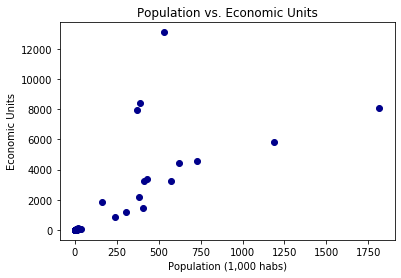

In [84]:
# x and y values
x_values = consolidated_data_NA['Poblacion total']/1000
y_values = consolidated_data_NA['Establecimientos']

# Plot scatter plot
plt.scatter(x_values, y_values, c = 'darkblue', marker = 'o')
#plt.grid()

# Label plot
plt.title('Population vs. Economic Units')
plt.xlabel('Population (1,000 habs)')
plt.ylabel('Economic Units')

# Save the Figure
#plt.savefig("Fig1.png")

# Show plot
plt.show()

### Households vs. Economic Units

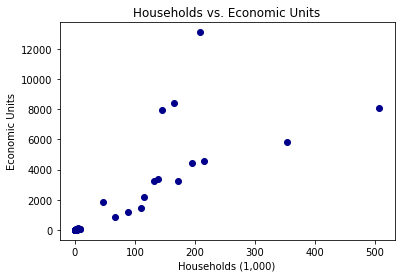

In [90]:
# x and y values
x_values = consolidated_data_NA['Total de viviendas']/1000
y_values = consolidated_data_NA['Establecimientos']

# Plot scatter plot
plt.scatter(x_values, y_values, c = 'darkblue', marker = 'o')
#plt.grid()

# Label plot
plt.title('Households vs. Economic Units')
plt.xlabel('Households (1,000)')
plt.ylabel('Economic Units')

# Save the Figure
#plt.savefig("Fig1.png")

# Show plot
plt.show()

### Average of Education Years vs. Economic Units

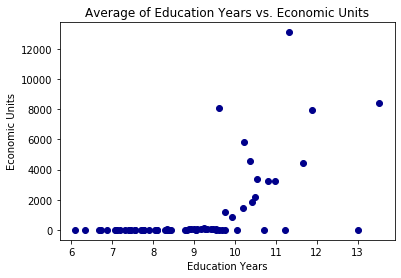

In [91]:
# x and y values
x_values = consolidated_data_NA['Grado promedio de escolaridad']
y_values = consolidated_data_NA['Establecimientos']

# Plot scatter plot
plt.scatter(x_values, y_values, c = 'darkblue', marker = 'o')
#plt.grid()

# Label plot
plt.title('Average of Education Years vs. Economic Units')
plt.xlabel('Education Years')
plt.ylabel('Economic Units')

# Save the Figure
#plt.savefig("Fig1.png")

# Show plot
plt.show()

# Test Hypothesis

### Education and Existence of Economic Units

In [120]:
# Separate samples:
consolidated_data_HT = consolidated_data
consolidated_data_HT['bolean'] = consolidated_data_HT['Establecimientos'].isnull()
consolidated_data_HT['Sample'] = [1 if bolean == False else 0 for bolean in consolidated_data_HT['bolean']]
consolidated_data_HT = consolidated_data_HT.drop(columns = 'bolean')
consolidated_data_HT.head()

,cve_ent,Nombre de la entidad,cve_mun,Nombre del municipio,cve_loc,Nombre de la localidad,Latitud,Longitud,Poblacion total,Poblacion 15 a 17,Poblacion 18 a 24,Poblacion 15 a 17 que asiste a la escuela,Poblacion 18 a 24 que asiste a la escuela,Grado promedio de escolaridad,Total de viviendas,Total de viviendas habitadas,Establecimientos,Sample
0,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,192858.0,991100.0,414711.0,18922.0,47181.0,15904.0,22237.0,10.80,132135.0,117264.0,3218.0,1
1,9,Distrito Federal,3,Coyoacán,1,Coyoacán,192100.0,990942.0,620416.0,26665.0,69383.0,22072.0,36164.0,11.66,195589.0,180946.0,4414.0,1
2,9,Distrito Federal,4,Cuajimalpa de Morelos,1,Cuajimalpa de Morelos,192228.0,991705.0,160491.0,8304.0,20523.0,6296.0,7534.0,10.42,47346.0,41708.0,1835.0,1
3,9,Distrito Federal,4,Cuajimalpa de Morelos,10,Cruz Blanca,191906.0,991924.0,581.0,49.0,87.0,37.0,20.0,7.69,165.0,137.0,NaN,0
4,9,Distrito Federal,4,Cuajimalpa de Morelos,20,San Lorenzo Acopilco,191944.0,991932.0,23037.0,1316.0,3078.0,955.0,966.0,9.17,6024.0,5510.0,35.0,1


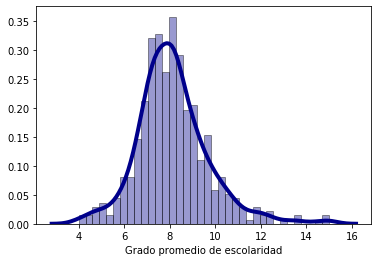

In [123]:
# Density Plot and Histogram of all arrival delays
sns.distplot(consolidated_data_HT['Grado promedio de escolaridad'], hist = True, kde = True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

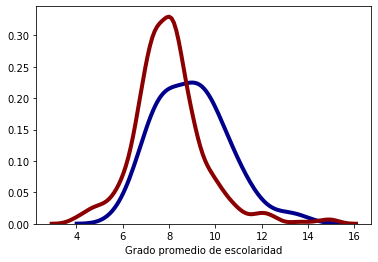

In [126]:
# Two variables
Educa_Esta = consolidated_data_HT[consolidated_data_HT['Sample'] == 1]
Educa_Esta = Educa_Esta['Grado promedio de escolaridad']

Educa_NoEsta = consolidated_data_HT[consolidated_data_HT['Sample'] == 0]
Educa_NoEsta = Educa_NoEsta['Grado promedio de escolaridad']

# Density Plot and Histogram of all arrival delays
sns.distplot(Educa_Esta, hist = False, kde = True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(Educa_NoEsta, hist = False, kde = True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
